In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Loading MNIST dataset 

In [34]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [35]:
print(x_train.shape,y_train.shape) 

(60000, 28, 28) (60000,)


3


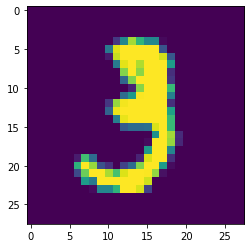

In [36]:
#print(x_train[10]) #prints numpy array
plt.imshow(x_train[10])
print(y_train[10])


# Scaling the numpy arrays

In [37]:
x_train= x_train/255
x_test= x_test/255

In [6]:
#x_train[10]

# Building The Neural Network

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

# Compiling The Model 

In [39]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train The Model

In [40]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8495 - loss: 0.5179
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9544 - loss: 0.1495
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9670 - loss: 0.1066
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9751 - loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9797 - loss: 0.0677
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9837 - loss: 0.0552
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9871 - loss: 0.0465
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0396
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0345
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0328


# Testing The Model

In [41]:
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.1558
0.9674000144004822


In [42]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [43]:
print(y_pred.shape)
y_pred_label= [np.argmax(i) for i in y_pred]
#print(y_pred_label)

(10000, 10)


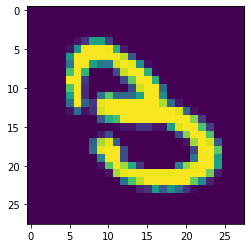

In [44]:
plt.imshow(x_test[18])

In [95]:
y_pred_label[18]

3

# Checking on Custom Image

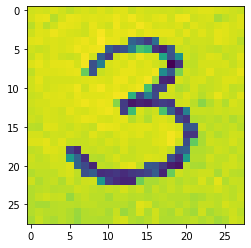

The given digit is identified as :: 3


In [105]:
img = cv2.imread('3.jpeg')
grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
resized_img = cv2.resize(grayscale,(28,28))
plt.imshow(resized_img)
plt.show()
input_img = resized_img/255
final_img = np.reshape(input_img,[1,28,28])
output = model.predict(final_img)
output_label = np.argmax(output)
print("The given digit is identified as ::",output_label)